In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [6]:
bos.shape

(506, 13)

In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [10]:
boston.items()

dict_items([('data', array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])), ('target', array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6,

In [11]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bos.columns=boston.feature_names

In [13]:
bos['PRICE']=boston.target

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0,0.5,'Frequency')

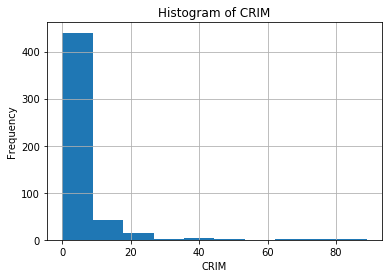

In [31]:
bos.CRIM.hist()
plt.title('Histogram of CRIM')
plt.xlabel('CRIM')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

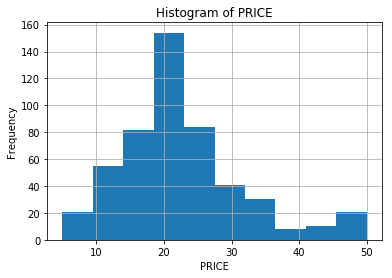

In [32]:
bos.PRICE.hist()
plt.title('Histogram of PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')

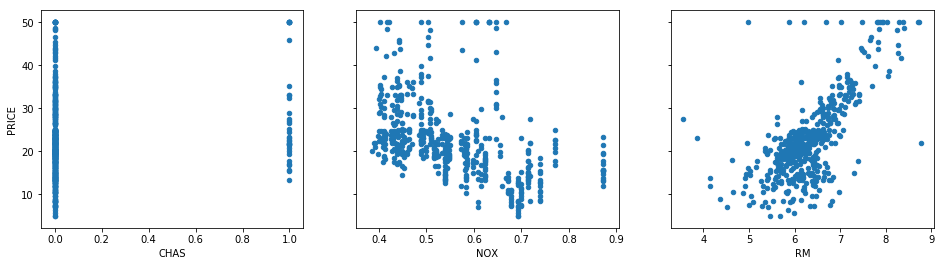

In [53]:
fig,  axs  = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='CHAS', y='PRICE', ax=axs[0], figsize=(16, 4))
bos.plot(kind='scatter', x='NOX', y='PRICE', ax=axs[1], figsize=(16, 4))
bos.plot(kind='scatter', x='RM', y='PRICE', ax=axs[2], figsize=(16, 4))

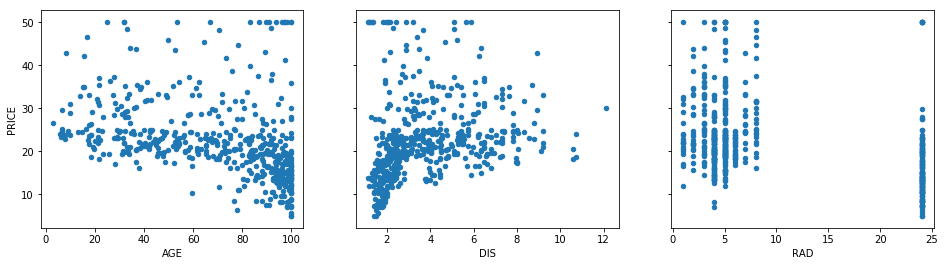

In [55]:
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='AGE', y='PRICE', ax=axs[0], figsize=(16, 4))
bos.plot(kind='scatter', x='DIS', y='PRICE', ax=axs[1], figsize=(16, 4))
bos.plot(kind='scatter', x='RAD', y='PRICE', ax=axs[2], figsize=(16, 4))

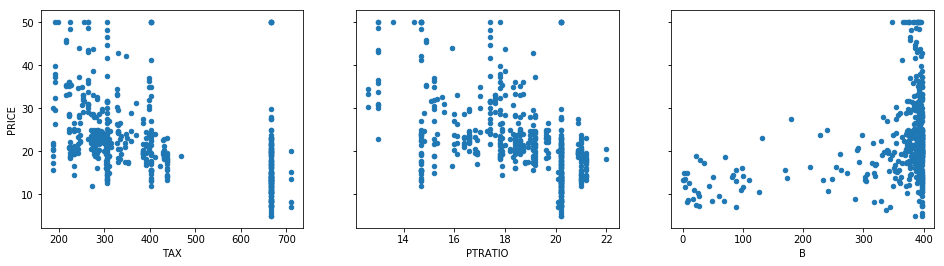

In [59]:
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x='TAX', y='PRICE', ax=axs[0], figsize=(16, 4))
bos.plot(kind='scatter', x='PTRATIO', y='PRICE', ax=axs[1], figsize=(16, 4))
bos.plot(kind='scatter', x='B', y='PRICE', ax=axs[2], figsize=(16, 4))

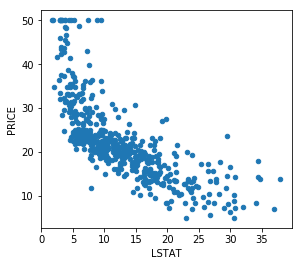

In [60]:
bos.plot(kind='scatter', x='LSTAT', y='PRICE',  figsize=(4.5, 4))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x=bos.drop('PRICE',axis=1)

In [35]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,bos.PRICE,test_size=0.33,random_state=5)

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
lm.score(x_test,y_test)

0.6955388005506338

In [41]:
lm.intercept_

32.858932634086806

In [42]:
lm.coef_

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [43]:
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

In [44]:
pred_train

array([13.16072876, 30.41654502, 13.56155988, 24.31597165, 20.60168017,
       13.46387418, 21.76426391, 14.29672518, 18.67601405, 22.10577161,
       33.44477729, 22.2740404 , 16.75294142, 30.87966613, 38.66148617,
       26.57778954, 25.99126956, 15.35860394, 15.67520649, 35.95582476,
       22.92948499, 33.62881167, 25.25458364, 20.8096454 , 16.91681516,
       23.39903742, 19.61377584, 30.37720465, 16.45581802, 25.54233718,
       26.6049999 , 23.78419935, 22.54074716, 32.88679588, 18.80357047,
       30.8730697 , 28.74500977, 13.33362726, 32.85170742, 27.37305898,
       19.60104079, 35.61043567, 14.57285385, 24.87494438, 28.32207238,
       22.36707385, 18.64003623, 20.92428707, 25.08035664, 19.71238517,
       32.14571068, 23.72852497, 19.35132712,  7.08362216,  5.4553063 ,
       22.25378614, 19.79507316, 20.53115261, 21.34785006, 17.67547237,
       31.13739933, 37.74282622, 20.08836416, 13.18689564, 27.1041762 ,
       16.64218913, 25.03437517, 18.4183762 , 24.02139217, 14.97

In [45]:
pred_test

array([37.46723562, 31.39154701, 27.1201962 ,  6.46843347, 33.62966737,
        5.67067989, 27.03946671, 29.92704748, 26.35661334, 22.45246021,
       32.20504441, 21.78641653, 23.41138441, 33.60894362, 28.28619511,
       15.13859055,  0.30087325, 18.71850376, 14.4706712 , 11.10823598,
        2.69494197, 19.21693734, 38.41159345, 24.36936442, 31.61493439,
       11.42210397, 24.92862188, 23.31178043, 22.7764079 , 20.65081211,
       16.035198  ,  7.07978633, 17.65509209, 22.81470561, 29.21943405,
       18.61354566, 28.37701843,  8.80516873, 41.65140459, 34.02910176,
       20.1868926 ,  3.95600857, 29.69124564, 12.18081256, 27.19403498,
       30.63699231, -6.24952457, 19.9462404 , 21.55123979, 13.36478173,
       20.39068171, 19.87353324, 23.57656877, 13.40141285, 17.66457201,
       24.77424747, 35.31476509, 15.48318159, 28.50764575, 21.72575404,
       20.58142839, 26.08460856, 14.51816968, 32.37494056, 20.80917392,
       12.18932524, 19.45551285, 25.23390429, 21.77302317, 21.30

Text(0,0.5,'Predictions')

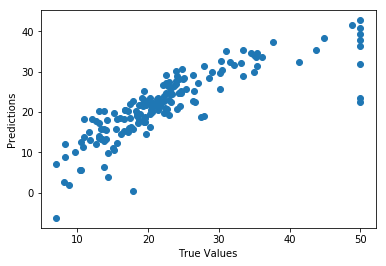

In [46]:
## The line / model
plt.scatter(y_test,pred_test)
plt.xscale('linear')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [47]:
np.mean((y_train-lm.predict(x_train)) ** 2)

19.54675847353466

In [48]:
np.mean((y_test-lm.predict(x_test)) ** 2)

28.541367275619013

Text(0,0.5,'Residuals')

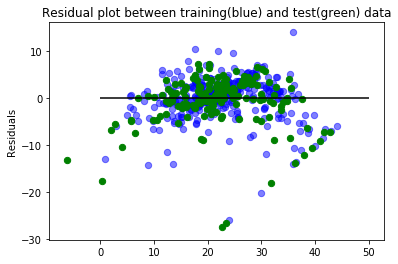

In [49]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot between training(blue) and test(green) data')
plt.ylabel('Residuals')